<a href="https://colab.research.google.com/github/Pratham-Rajeev-Agrawal/ML-Projects/blob/main/Wine_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
wine = pd.read_csv('/content/winequality-red.csv')

In [4]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine.shape

(1599, 12)

In [6]:
wine.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [7]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
wine['quality'].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


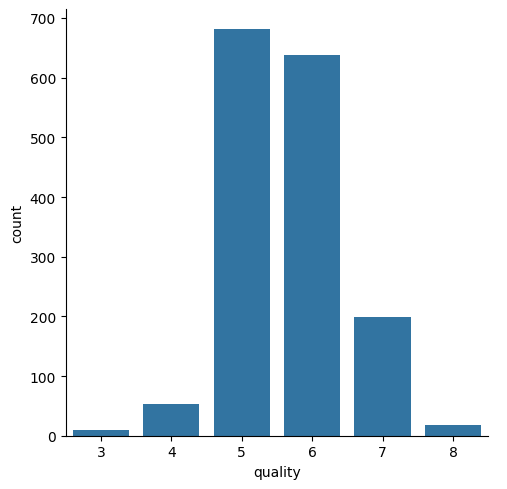

In [9]:
sns.catplot(x='quality', data = wine, kind = 'count')

<Axes: xlabel='quality', ylabel='citric acid'>

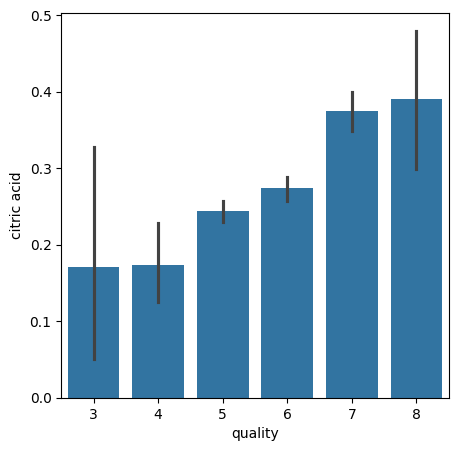

In [10]:
plot = plt.figure(figsize = (5,5))
sns.barplot(x='quality', y = 'citric acid', data = wine)

In [11]:
correl = wine.corr()

<Axes: >

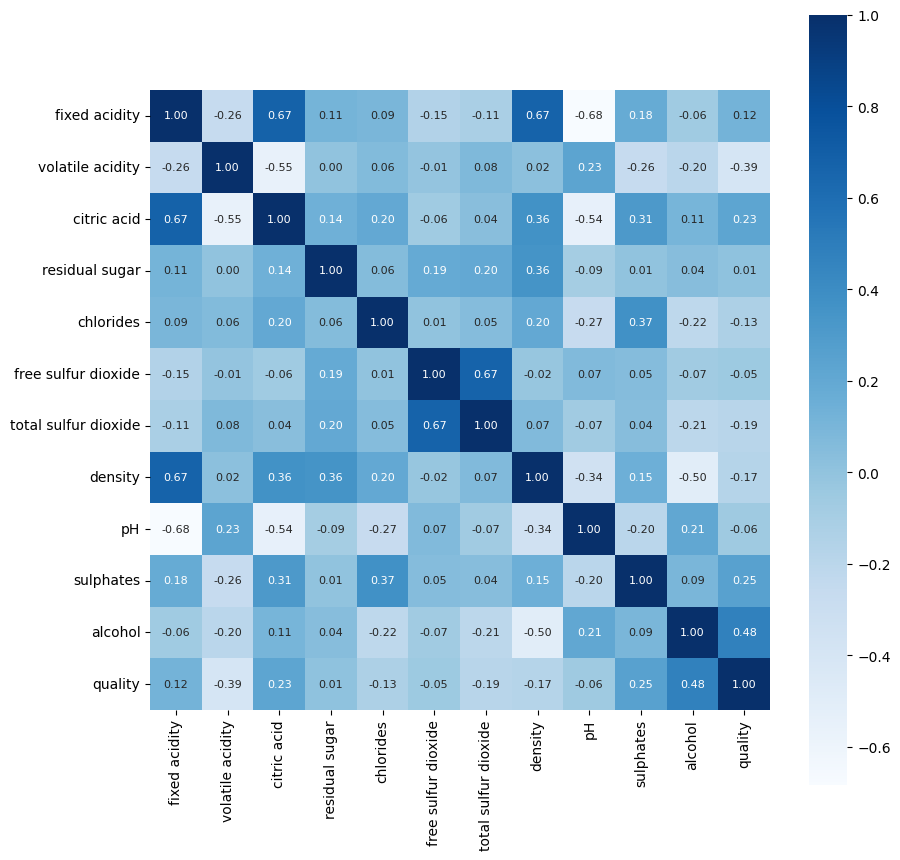

In [12]:
plt.figure(figsize = (10,10))
sns.heatmap(correl, cbar = True, square = True, fmt = '.2f', annot = True, annot_kws = {'size':8}, cmap = 'Blues')

In [13]:
x = wine.drop(columns = 'quality', axis = 1)
y = wine['quality']

In [14]:
y = wine['quality'].apply(lambda val:1 if val>=7 else 0)

In [15]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [16]:
y.value_counts()

,count
quality,
0,1382
1,217


In [17]:
x_train, t_test, y_train, y_test = train_test_split(x, y, random_state = 2, test_size = 0.2, stratify = y)

In [18]:
print(y_train.shape, y_test.shape)

(1279,) (320,)


In [19]:
model = RandomForestClassifier()

In [20]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [21]:
predict = model.predict(t_test)

In [22]:
accuracy = accuracy_score(predict, y_test)

In [23]:
print(accuracy)

0.946875


In [24]:
input = (7.8,	0.76,	0.04,	2.3,	0.092,	15.0,	54.0,	0.9970,	3.26,	0.65,	9.8)
npinput = np.asarray(input)
reshaped = npinput.reshape(1, -1)
predict = model.predict(reshaped)
print(predict)

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
